In [3]:
import numpy as np
import pandas as pd
import ast
import re
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
shelter_pets = pd.DataFrame()

# the data is saved in the data.txt file
# reading each line, each line of the file is a string and contains a dictionary inside "{'k1': ..., 'kn':...}"
# we use the ast library to get the dictionary from the string
# then save the dictionaries as rows of a dataframe to analyze 

counter = 0
with open('/Users/aminenhila/MyGithubRepo/Data_Science_Projects/Project2_Pet_Adoption/Data/data.txt', 'r', encoding='utf-8') as f:
    for item in f.readlines():
        item = ast.literal_eval(item)
        if 'Dog' in item.keys():
            item['Cat_or_Dog'] = 'Dog'
            item['Breed'] = item['Dog']
            del item['Dog']
            if len(item['Posted'])>1:
                item['Updated'] = item['Posted'][1]
                item['Posted'] = item['Posted'][0]
        elif 'Cat' in item.keys():
            item['Cat_or_Dog'] = 'Cat'
            item['Breed'] = item['Cat']
            del item['Cat']
            if len(item['Posted'])>1:
                item['Updated'] = item['Posted'][1]
                item['Posted'] = item['Posted'][0]
        
        item_df = pd.DataFrame.from_dict(item)
        shelter_pets=pd.concat([shelter_pets, item_df], axis=0)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [5]:
shelter_pets.shape

(1438, 16)

In [6]:
shelter_pets.head()

,Adoption Fee,Amount,Body,Breed,Cat_or_Dog,Color,Condition,Dewormed,Location,Neutered,Pet Discription,Posted,Profile,Spayed,Updated,Vaccinated
0,FREE,NaN,"Large Size, Long Fur",Husky,Dog,"Brown, White",Healthy,Yes,"Petaling Jaya, Selangor",Yes,\nHere come Husky boy who’s longing for a good...,5 Jan 2020,"Male, 1 Year",NaN,(Updated 17 Jan 2020),Yes
0,FREE,NaN,"Medium Size, Short Fur",Domestic Short Hair,Cat,"Black, Gray, White",Healthy,No,"Kuala Lumpur , Kuala Lumpur",No,\nThis cat was abandon in august 2019. very lo...,9 Oct 2019,"Male, 1 Year 3 Months",NaN,(Updated 17 Jan 2020),No
0,RM 50,NaN,"Medium Size, Short Fur",Domestic Short Hair + Tabby,Cat,Gray,Healthy,Yes,"Kuala Lumpur, Wilayah Persekutuan",NaN,\nBirthday: 10 June 2019She have a warm and lo...,3 Aug 2019,"Female, 6 Months",No,(Updated 16 Jan 2020),No
0,FREE,3 Pets,"Medium Size, Long Fur",Persian + Maine Coon,Cat,"Black, Gray",Healthy,Yes,"Cheras, Selangor",NaN,\nThese babies are staying with my cousin and ...,31 Dec 2019,"Mixed Gender, 6 Months",Not Sure,(Updated 16 Jan 2020),Not Sure
0,FREE,NaN,"Medium Size, Short Fur",Mixed Breed,Dog,"Black, Gray, White",Healthy,Yes,"Ipoh, Perak",Yes,\nSuper adorable & affectionate pup! ♥️ For ad...,7 Apr 2019,"Male, 1 Year 3 Months",NaN,(Updated 16 Jan 2020),Yes


In [7]:
# There are some pet profiles that contain info about more than one pet, 
# we will remove those and only consider 1 pet information profiles
# and therefore drop the 'Amount' column
shelter_pets = shelter_pets[shelter_pets['Amount'].isnull()]

In [8]:
shelter_pets = shelter_pets.drop(['Amount'], axis = 1)

In [9]:
# The Posted column entries have the form the following format, for example '24 OCT 2019'
# We will be making this into a format mm/dd/yyyy format
shelter_pets.Posted = pd.to_datetime(shelter_pets.Posted)


In [10]:
# The Updated column has ( , ) and Updated word which need to be removed
shelter_pets.Updated = shelter_pets.Updated.str.replace('(','')
shelter_pets.Updated = shelter_pets.Updated.str.replace(')','')
shelter_pets.Updated = shelter_pets.Updated.str.replace('Updated','')

In [11]:
# Now change the Updated column to datetime object
shelter_pets.Updated = pd.to_datetime(shelter_pets.Updated)
shelter_pets.head()

,Adoption Fee,Body,Breed,Cat_or_Dog,Color,Condition,Dewormed,Location,Neutered,Pet Discription,Posted,Profile,Spayed,Updated,Vaccinated
0,FREE,"Large Size, Long Fur",Husky,Dog,"Brown, White",Healthy,Yes,"Petaling Jaya, Selangor",Yes,\nHere come Husky boy who’s longing for a good...,2020-01-05,"Male, 1 Year",NaN,2020-01-17,Yes
0,FREE,"Medium Size, Short Fur",Domestic Short Hair,Cat,"Black, Gray, White",Healthy,No,"Kuala Lumpur , Kuala Lumpur",No,\nThis cat was abandon in august 2019. very lo...,2019-10-09,"Male, 1 Year 3 Months",NaN,2020-01-17,No
0,RM 50,"Medium Size, Short Fur",Domestic Short Hair + Tabby,Cat,Gray,Healthy,Yes,"Kuala Lumpur, Wilayah Persekutuan",NaN,\nBirthday: 10 June 2019She have a warm and lo...,2019-08-03,"Female, 6 Months",No,2020-01-16,No
0,FREE,"Medium Size, Short Fur",Mixed Breed,Dog,"Black, Gray, White",Healthy,Yes,"Ipoh, Perak",Yes,\nSuper adorable & affectionate pup! ♥️ For ad...,2019-04-07,"Male, 1 Year 3 Months",NaN,2020-01-16,Yes
0,FREE,"Medium Size, Short Fur",Collie Mix,Dog,"Brown, Cream, White",Healthy,Yes,"Ipoh, Perak",Yes,\nGentle & cuddly Panda Boy for adoption. He’s...,2019-11-23,"Male, 1 Year 6 Months",NaN,2020-01-16,Yes


In [12]:
# separating the dog/cat gender from the age
shelter_pets['Gender'] = [i[0] for i in shelter_pets.Profile.str.split(',')]
shelter_pets['Age'] = [i[1] for i in shelter_pets.Profile.str.split(',')]

In [13]:
# separate the body size from fur length
shelter_pets['Body Size'] = [i[0] for i in shelter_pets.Body.str.split(',')]
shelter_pets['Fur length'] = [i[1] for i in shelter_pets.Body.str.split(',')]

In [14]:
# no need to keep the columns Body and Profile that contained info on gender, age, size and fur length
shelter_pets = shelter_pets.drop(['Body','Profile'], axis = 1)


In [15]:
# change the Adoption Fee column Free to 0
# and drop the 'RM' 
shelter_pets.loc[shelter_pets['Adoption Fee'].str.contains('RM'), 'Adoption Fee'] = shelter_pets.loc[shelter_pets['Adoption Fee'].str.contains('RM'), 'Adoption Fee'].str.replace('RM ','')
shelter_pets.loc[shelter_pets['Adoption Fee'] == 'FREE','Adoption Fee'] = 0
# convert  string to integer
shelter_pets['Adoption Fee'] = pd.to_numeric(shelter_pets['Adoption Fee'])
shelter_pets['Adoption Fee in Malaysian RM'] = shelter_pets['Adoption Fee']
shelter_pets = shelter_pets.drop(['Adoption Fee'], axis = 1)

In [16]:
shelter_pets

,Breed,Cat_or_Dog,Color,Condition,Dewormed,Location,Neutered,Pet Discription,Posted,Spayed,Updated,Vaccinated,Gender,Age,Body Size,Fur length,Adoption Fee in Malaysian RM
0,Husky,Dog,"Brown, White",Healthy,Yes,"Petaling Jaya, Selangor",Yes,\nHere come Husky boy who’s longing for a good...,2020-01-05,NaN,2020-01-17,Yes,Male,1 Year,Large Size,Long Fur,0
0,Domestic Short Hair,Cat,"Black, Gray, White",Healthy,No,"Kuala Lumpur , Kuala Lumpur",No,\nThis cat was abandon in august 2019. very lo...,2019-10-09,NaN,2020-01-17,No,Male,1 Year 3 Months,Medium Size,Short Fur,0
0,Domestic Short Hair + Tabby,Cat,Gray,Healthy,Yes,"Kuala Lumpur, Wilayah Persekutuan",NaN,\nBirthday: 10 June 2019She have a warm and lo...,2019-08-03,No,2020-01-16,No,Female,6 Months,Medium Size,Short Fur,50
0,Mixed Breed,Dog,"Black, Gray, White",Healthy,Yes,"Ipoh, Perak",Yes,\nSuper adorable & affectionate pup! ♥️ For ad...,2019-04-07,NaN,2020-01-16,Yes,Male,1 Year 3 Months,Medium Size,Short Fur,0
0,Collie Mix,Dog,"Brown, Cream, White",Healthy,Yes,"Ipoh, Perak",Yes,\nGentle & cuddly Panda Boy for adoption. He’s...,2019-11-23,NaN,2020-01-16,Yes,Male,1 Year 6 Months,Medium Size,Short Fur,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,Siamese + Domestic Short Hair,Cat,"Black, Brown, Yellow",Healthy,Yes,"Kepong, Kuala Lumpur",NaN,\ni have a kitten that i have saved with my wi...,2019-03-31,No,2019-06-27,Yes,Female,1 Year,Medium Size,Short Fur,0
0,Domestic Short Hair,Cat,"Golden, Gray, White",Healthy,Yes,"Damansara, Selangor",NaN,\nRescued kitten urgently need a new loving ho...,2019-03-30,No,2019-06-27,No,Female,1 Year,Small Size,Short Fur,0
0,Terrier + Poodle,Dog,"Black, Brown",Healthy,Yes,"Kuala Lumpur, Wilayah Persekutuan",NaN,\nShe was rescued from a family who refused to...,2019-06-14,No,2019-06-27,No,Female,2 Months,Small Size,Medium Fur,0
0,Domestic Short Hair,Cat,"Golden, Cream",Healthy,Yes,"SERI KEMBANGAN, Selangor",No,\nWhatsapp Me\n,2019-01-15,NaN,2019-06-27,No,Male,10 Months,Medium Size,Short Fur,0


In [17]:
# The age column has the age in terms of year and month (separate), we will convert this to a float (in years)

# strip the extra space in the beginning and end
shelter_pets.Age = shelter_pets.Age.str.replace('s','')
for i in range(len(shelter_pets)):
    if ('Year' in shelter_pets.iloc[i]['Age']) and ('Month' not in shelter_pets.iloc[i]['Age']):
        shelter_pets.Age.iloc[i] = shelter_pets.iloc[i]['Age'] + ' 0 Month'
    elif ('Year' not in shelter_pets.iloc[i]['Age']) and ('Month' in shelter_pets.iloc[i]['Age']):
        shelter_pets.Age.iloc[i] = '0 Year ' + shelter_pets.iloc[i]['Age']
shelter_pets['Age in months'] = [int(i[0])*12 + int(i[2]) for i in shelter_pets.Age.str.split()]
shelter_pets = shelter_pets.drop(['Age'], axis = 1)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [18]:
shelter_pets =shelter_pets.loc[shelter_pets['Age in months']!=0,:]

In [19]:
# using the Petfinder.my Kaggle dataset to get the labels of Malasia states, dog/cat breed and the colors
# Type 1 = Dog
# Type 2 = Cat
breed_labels = pd.read_csv('/Users/aminenhila/MyGithubRepo/Data_Science_Projects/Project2_Pet_Adoption/Data/PetFinder-BreedLabels.csv')
state_labels = pd.read_csv('/Users/aminenhila/MyGithubRepo/Data_Science_Projects/Project2_Pet_Adoption/Data/PetFinder-StateLabels.csv')
color_labels = pd.read_csv('/Users/aminenhila/MyGithubRepo/Data_Science_Projects/Project2_Pet_Adoption/Data/PetFinder-ColorLabels.csv')

In [20]:
state_labels['StateName'] = state_labels.StateName.str.lower()

In [21]:
state_labels

,StateID,StateName
0,41336,johor
1,41325,kedah
2,41367,kelantan
3,41401,kuala lumpur
4,41415,labuan
5,41324,melaka
6,41332,negeri sembilan
7,41335,pahang
8,41330,perak
9,41380,perlis


In [22]:
# creating a cleaner Region of Country column based on the Location column
state_series_list = []
for i in range(len(state_labels)):
    state_list = [state_labels.StateName[i] if state_labels.StateName[i] in j else '' for j in shelter_pets.Location.str.lower()]
    state_series_list.append(state_list)
state_df = pd.DataFrame(state_series_list).transpose()
RofC = state_df.fillna('').max(axis=1) # the new column

shelter_pets = shelter_pets.assign(Region_of_Country = RofC.values)

shelter_pets = shelter_pets.drop(['Location'], axis = 1)

In [23]:
# putting the spayed and neutered columns together

S_N = shelter_pets[['Neutered','Spayed']].fillna('').max(axis=1)
shelter_pets = shelter_pets.assign(Neutered_Spayed = S_N.values)
shelter_pets = shelter_pets.drop(['Neutered', 'Spayed'], axis = 1)

In [24]:
color_labels.ColorName

0     Black
1     Brown
2    Golden
3    Yellow
4     Cream
5      Gray
6     White
Name: ColorName, dtype: object

In [25]:
# creating a column for each color with 1 in entry if the pet has that color and 0 if not
# drop the original color column since we don't need it anymore
shelter_pets['Color_Black'] = ['Black' if 'Black' in i else '' for i in shelter_pets.Color]
shelter_pets['Color_Brown'] = ['Brown' if 'Brown' in i else '' for i in shelter_pets.Color]
shelter_pets['Color_Golden'] = ['Golden' if 'Golden' in i else '' for i in shelter_pets.Color]
shelter_pets['Color_Yellow'] = ['Yellow' if 'Yellow' in i else '' for i in shelter_pets.Color]
shelter_pets['Color_Cream'] = ['Cream' if 'Cream' in i else '' for i in shelter_pets.Color]
shelter_pets['Color_Gray'] = ['Gray' if 'Gray' in i else '' for i in shelter_pets.Color]
shelter_pets['Color_White'] = ['White' if 'White' in i else '' for i in shelter_pets.Color]

shelter_pets = shelter_pets.drop(['Color'], axis = 1)

In [26]:
shelter_pets.head()

,Breed,Cat_or_Dog,Condition,Dewormed,Pet Discription,Posted,Updated,Vaccinated,Gender,Body Size,...,Age in months,Region_of_Country,Neutered_Spayed,Color_Black,Color_Brown,Color_Golden,Color_Yellow,Color_Cream,Color_Gray,Color_White
0,Husky,Dog,Healthy,Yes,\nHere come Husky boy who’s longing for a good...,2020-01-05,2020-01-17,Yes,Male,Large Size,...,12,selangor,Yes,,Brown,,,,,White
0,Domestic Short Hair,Cat,Healthy,No,\nThis cat was abandon in august 2019. very lo...,2019-10-09,2020-01-17,No,Male,Medium Size,...,15,kuala lumpur,No,Black,,,,,Gray,White
0,Domestic Short Hair + Tabby,Cat,Healthy,Yes,\nBirthday: 10 June 2019She have a warm and lo...,2019-08-03,2020-01-16,No,Female,Medium Size,...,6,kuala lumpur,No,,,,,,Gray,
0,Mixed Breed,Dog,Healthy,Yes,\nSuper adorable & affectionate pup! ♥️ For ad...,2019-04-07,2020-01-16,Yes,Male,Medium Size,...,15,perak,Yes,Black,,,,,Gray,White
0,Collie Mix,Dog,Healthy,Yes,\nGentle & cuddly Panda Boy for adoption. He’s...,2019-11-23,2020-01-16,Yes,Male,Medium Size,...,18,perak,Yes,,Brown,,,Cream,,White


In [27]:
# dropping rows that have NaN Upated dates
shelter_pets = shelter_pets.dropna(subset=['Updated'])

In [28]:
# get the length of adoption 
shelter_pets['Adoption_Length'] = [(i-j).days for i,j in zip(shelter_pets.Updated, shelter_pets.Posted)]

In [29]:
# separate the breed column into Breed1 and Breed2 columns
for i in range(len(shelter_pets)):
    if '+' not in shelter_pets.iloc[i]['Breed']:
         shelter_pets.Breed.iloc[i] = shelter_pets.iloc[i]['Breed'] + '+'
shelter_pets['Breed_1'] = [i[0] for i in shelter_pets.Breed.str.split('+')]
shelter_pets['Breed_2'] = [i[1] for i in shelter_pets.Breed.str.split('+')]

shelter_pets = shelter_pets.drop(['Breed'], axis = 1)


There are some pet profiles that have very large adoption length, some of those could be true but some of those can also be resut of an error (for example, the pet profile didn't get updated after an adoption). Since we don't have a way to check which numbers are correct, we will find the outliers and remove them from the data

Find the outliers and remove from the data

{'whiskers': [<matplotlib.lines.Line2D at 0x11fe03c90>,
 'caps': [<matplotlib.lines.Line2D at 0x121658d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x12137cc50>],
 'medians': [<matplotlib.lines.Line2D at 0x10fe5f150>],
 'fliers': [<matplotlib.lines.Line2D at 0x12184e9d0>],
 'means': []}

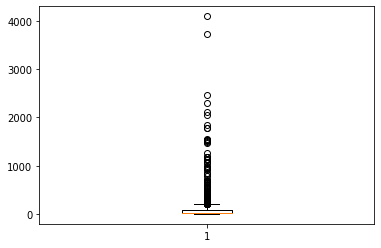

In [30]:
plt.boxplot((shelter_pets.Adoption_Length))

In [31]:
shelter_pets.describe()

,Adoption Fee in Malaysian RM,Age in months,Adoption_Length
count,1193.000000,1193.000000,1193.000000
mean,36.764459,16.319363,110.446773
std,88.528599,22.457031,293.138368
min,0.000000,1.000000,1.000000
25%,0.000000,5.000000,10.000000
50%,0.000000,8.000000,28.000000
75%,0.000000,16.000000,90.000000
max,1270.000000,189.000000,4097.000000


In [32]:
# get the 1st,2nd,3rd, IQR quartiles to calculate outliers
Q1 = 10
Q2 = 28
Q3 = 90
IQR = Q3-Q1

#outliers are values less than Q1-1.5IQR or greater than Q3 +1.5IQR
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
print(lower_limit, upper_limit)

-110.0 210.0


In [35]:
shelter_pets[shelter_pets.Adoption_Length >210].shape

(118, 24)

There are 118 pet profiels that have adoption length of bigger than 210, we will remove those

In [ ]:
new_shelter_pets = shelter_pets.loc[shelter_pets.Adoption_Length <= 210,]

In [36]:
new_shelter_pets = shelter_pets.loc[shelter_pets.Adoption_Length <= 210,]


In [37]:
new_shelter_pets.describe()

,Adoption Fee in Malaysian RM,Age in months,Adoption_Length
count,1075.000000,1075.000000,1075.000000
mean,34.051163,13.861395,43.483721
std,79.818802,19.560543,48.613653
min,0.000000,1.000000,1.000000
25%,0.000000,5.000000,9.000000
50%,0.000000,8.000000,23.000000
75%,0.000000,13.000000,60.500000
max,600.000000,184.000000,210.000000


In [41]:
def adoption_category(df):
    '''This function converts the adoption length which is a 
    continous column into categorical feature
    '''
    if df['Adoption_Length'] <= 14:
        return '0-14 days'
    elif 14 < df['Adoption_Length'] <= 30:
        return '14-30 days'
    elif 30 < df['Adoption_Length'] <= 90:
        return '31-90 days'
    else:
        return '91 or more days'

new_shelter_pets['Adoption_Length_categories'] = new_shelter_pets.apply(adoption_category, axis=1)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [42]:
def pet_age(df):
    '''This function converts the pet age into categorical variable'''
    if df['Age in months'] <= 12:
        return '0-1 years'
    elif 12 < df['Age in months'] <= 4*12:
        return '1-4 years'
    elif 4*12 < df['Age in months'] <= 8*12:
        return '4-8 years'
    elif 8*12 < df['Age in months'] <= 17*12:
        return '8 or more years'
    
new_shelter_pets['Age_category'] = new_shelter_pets.apply(pet_age,axis=1)       

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [43]:
new_shelter_pets.head()

,Cat_or_Dog,Condition,Dewormed,Pet Discription,Posted,Updated,Vaccinated,Gender,Body Size,Fur length,...,Color_Golden,Color_Yellow,Color_Cream,Color_Gray,Color_White,Adoption_Length,Breed_1,Breed_2,Adoption_Length_categories,Age_category
0,Dog,Healthy,Yes,\nHere come Husky boy who’s longing for a good...,2020-01-05,2020-01-17,Yes,Male,Large Size,Long Fur,...,,,,,White,12,Husky,,0-14 days,0-1 years
0,Cat,Healthy,No,\nThis cat was abandon in august 2019. very lo...,2019-10-09,2020-01-17,No,Male,Medium Size,Short Fur,...,,,,Gray,White,100,Domestic Short Hair,,91 or more days,1-4 years
0,Cat,Healthy,Yes,\nBirthday: 10 June 2019She have a warm and lo...,2019-08-03,2020-01-16,No,Female,Medium Size,Short Fur,...,,,,Gray,,166,Domestic Short Hair,Tabby,91 or more days,0-1 years
0,Dog,Healthy,Yes,\nGentle & cuddly Panda Boy for adoption. He’s...,2019-11-23,2020-01-16,Yes,Male,Medium Size,Short Fur,...,,,Cream,,White,54,Collie Mix,,31-90 days,1-4 years
0,Cat,Minor Injury,Yes,\nFound her in a carpark a couple months ago. ...,2020-01-04,2020-01-15,No,Female,Small Size,Short Fur,...,,,,,,11,Bengal,,0-14 days,4-8 years


In [44]:
new_shelter_pets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1075 entries, 0 to 0
Data columns (total 26 columns):
Cat_or_Dog                      1075 non-null object
Condition                       1075 non-null object
Dewormed                        1075 non-null object
Pet Discription                 1075 non-null object
Posted                          1075 non-null datetime64[ns]
Updated                         1075 non-null datetime64[ns]
Vaccinated                      1075 non-null object
Gender                          1075 non-null object
Body Size                       1075 non-null object
Fur length                      1075 non-null object
Adoption Fee in Malaysian RM    1075 non-null int64
Age in months                   1075 non-null int64
Region_of_Country               1075 non-null object
Neutered_Spayed                 1075 non-null object
Color_Black                     1075 non-null object
Color_Brown                     1075 non-null object
Color_Golden                    10

In [45]:
new_shelter_pets.columns

Index(['Cat_or_Dog', 'Condition', 'Dewormed', 'Pet Discription', 'Posted',
       'Updated', 'Vaccinated', 'Gender', 'Body Size', 'Fur length',
       'Adoption Fee in Malaysian RM', 'Age in months', 'Region_of_Country',
       'Neutered_Spayed', 'Color_Black', 'Color_Brown', 'Color_Golden',
       'Color_Yellow', 'Color_Cream', 'Color_Gray', 'Color_White',
       'Adoption_Length', 'Breed_1', 'Breed_2', 'Adoption_Length_categories',
       'Age_category'],
      dtype='object')

In [46]:
new_shelter_pets = new_shelter_pets[['Cat_or_Dog','Gender','Breed_1', 'Breed_2', 'Adoption Fee in Malaysian RM', 'Age in months','Age_category', 
        'Region_of_Country','Condition', 'Dewormed',  'Vaccinated',  'Body Size', 'Fur length',
        'Neutered_Spayed', 'Color_Black', 'Color_Brown', 'Color_Golden',
       'Color_Yellow', 'Color_Cream', 'Color_Gray', 'Color_White',
        'Pet Discription', 'Posted',
       'Updated','Adoption_Length','Adoption_Length_categories']]

In [47]:
new_shelter_pets.to_csv('/Users/aminenhila/MyGithubRepo/Data_Science_Projects/Project2_Pet_Adoption/Data/shelter_pets.csv', index = False, na_rep = '')